# Wine EDA Countrywise

In [1]:
import plotly.express as px
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")

In [3]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Data Cleaning
## Dealt with NULL values and grouped by countries

In [4]:
df[df['price'].isna()]


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129844,129844,Italy,"Doga delle Clavule is a neutral, mineral-drive...",Doga delle Clavule,86,NaN,Tuscany,Morellino di Scansano,NaN,NaN,NaN,Caparzo 2006 Doga delle Clavule (Morellino di...,Sangiovese,Caparzo
129860,129860,Portugal,This rich wine has a firm structure as well as...,Pacheca Superior,90,NaN,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta da Pacheca 2013 Pacheca Superior Red (D...,Portuguese Red,Quinta da Pacheca
129863,129863,Portugal,This mature wine that has 50% Touriga Nacional...,Reserva,90,NaN,Dão,NaN,NaN,Roger Voss,@vossroger,Seacampo 2011 Reserva Red (Dão),Portuguese Red,Seacampo
129893,129893,Italy,"Aromas of passion fruit, hay and a vegetal not...",Corte Menini,91,NaN,Veneto,Soave Classico,NaN,Kerin O’Keefe,@kerinokeefe,Le Mandolare 2015 Corte Menini (Soave Classico),Garganega,Le Mandolare


In [5]:
df.isnull().any()

Unnamed: 0               False
country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

In [6]:
df.shape

(129971, 14)

In [7]:
df_mean = df.groupby('country').aggregate({'price':'mean','points':'mean'})

In [8]:
df_mean=df_mean.reset_index()

In [9]:
df2 = df_mean[['country','price','points']]

In [10]:
df2.isnull().any()

country    False
price       True
points     False
dtype: bool

In [11]:
df2=df2.dropna(subset=['country'])

In [12]:
df2['country'].unique()

array(['Argentina', 'Armenia', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'Egypt', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Israel', 'Italy', 'Lebanon', 'Luxembourg', 'Macedonia', 'Mexico',
       'Moldova', 'Morocco', 'New Zealand', 'Peru', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Switzerland', 'Turkey', 'US', 'Ukraine', 'Uruguay'], dtype=object)

In [13]:
df2.isnull().any()

country    False
price       True
points     False
dtype: bool

In [14]:
df2['price']=df2['price'].fillna(0)

In [15]:
df2.head()

,country,price,points
0,Argentina,24.510117,86.710263
1,Armenia,14.500000,87.500000
2,Australia,35.437663,88.580507
3,Austria,30.762772,90.101345
4,Bosnia and Herzegovina,12.500000,86.500000


In [16]:
df2.isnull().any()

country    False
price      False
points     False
dtype: bool

In [17]:
# Calculate the minimum and maximum values of the mean_price column
min_price = df2['price'].min()
max_price = df2['price'].max()

# Price Vs Country Plot

In [18]:
fig=px.choropleth(df2,locations='country',locationmode='country names' , color='price', range_color=(min_price, max_price), scope="world")
fig.show()

In [19]:
# Calculate the minimum and maximum values of the mean_price column
min_points = df2['points'].min()
max_points = df2['points'].max()

# Country Vs Points Plot

In [20]:
fig=px.choropleth(df2,locations='country',locationmode='country names' , color='points', range_color=(min_points, max_points), scope="world")
fig.show()

# Distributions of Numeric Columns of Dataset

## For Points

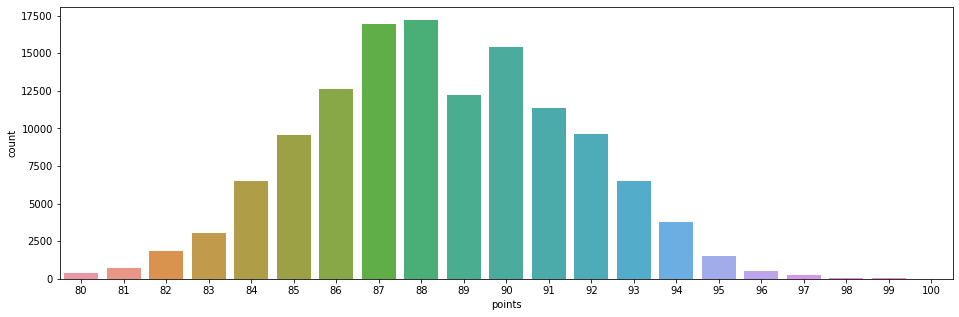

In [21]:
plt.figure(figsize=(16,5))
g = sns.countplot(x='points', data=df)
plt.show()

## For Price

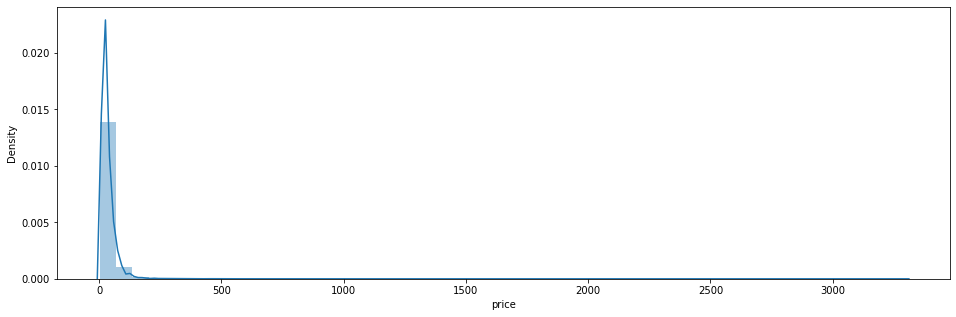

In [22]:
plt.figure(figsize=(16,5))
g = sns.distplot(df['price'])
plt.show()

### Since the above looks weird I will take a log tranform of the data and try

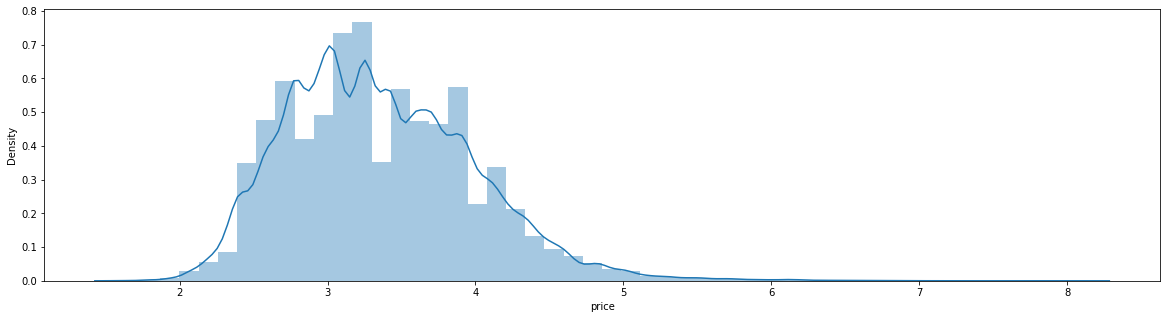

In [23]:
plt.figure(figsize=(20,5))
g1 = sns.distplot(np.log(df['price'].dropna() + 1))
plt.show()

## Checking for values less 300 

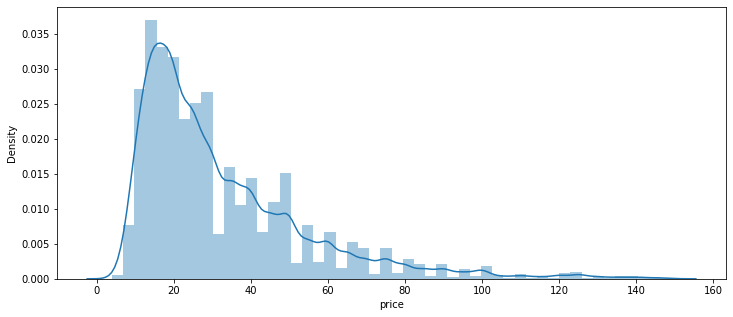

In [24]:
plt.figure(figsize=(12,5))

g = sns.distplot(df[df['price'] < 150]['price'])
plt.show()